In [2]:
%pip install yfinance matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
class Stock:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.data = yf.Ticker(ticker).history(start=start, end=end)
        self.data['Date'] = self.data.index
        self.data['Date'] = self.data['Date'].dt.strftime('%Y-%m-%d')
        self.data = self.data.reset_index(drop=True)
        self.price = self.data['Close']
        self.price.index = self.data['Date']

In [17]:
money = 1000000
shares = 0

def buy(stock, date):
    global money
    global shares
    price = stock.price[date]
    shares = money // price
    money -= shares * price

def sell(stock, date):
    global money
    global shares
    price = stock.price[date]
    money += shares * price
    shares = 0

/tmp/ipykernel_15243/3702264450.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock.price[i] > highest:
/tmp/ipykernel_15243/3702264450.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock.price[i] < lowest:
/tmp/ipykernel_15243/3702264450.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock.price[i] < highest * 0.95:
/tmp/ipykernel_15243/3702264450.py:23: FutureWarning: Series.__getitem__ treating keys a

KeyboardInterrupt: 

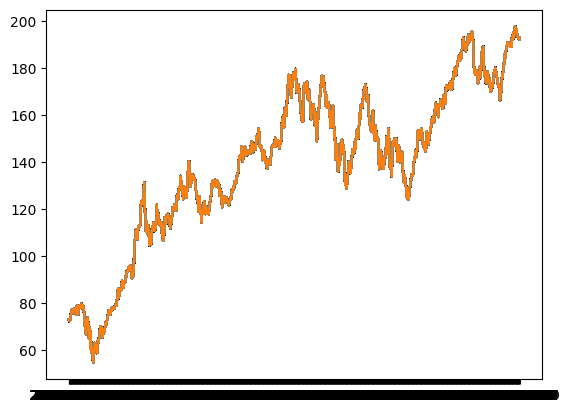

In [20]:
aapl = Stock('AAPL', '2020-01-01', '2023-12-31')
aapl.price


def strategy1(stock):
    buy(stock, '2020-01-02')
    sell(stock, '2023-12-29')
    print(money)

def strategy2(stock):
    highest = float('-inf')
    lowest = float('inf')
    for i in range(len(stock.price)):
        if stock.price[i] > highest:
            highest = i
        if stock.price[i] < lowest:
            lowest = i
        
        if stock.price[i] < highest * 0.95:
            buy(stock, stock.price.index[i])

        
        if stock. > lowest * 1.05:
            sell(stock, stock.price.index[i])
        
        # Plot
        plt.plot(stock.price)

    plt.show()
    
strategy2(aapl)

    